ic| pca:       first    second
         0 -0.136323 -1.272006
         1  0.136298 -1.272236
ic| values: 0    0.192772
            1    1.799050
            Name: value, dtype: float64


0.19277206044268727
1.7990505640830436


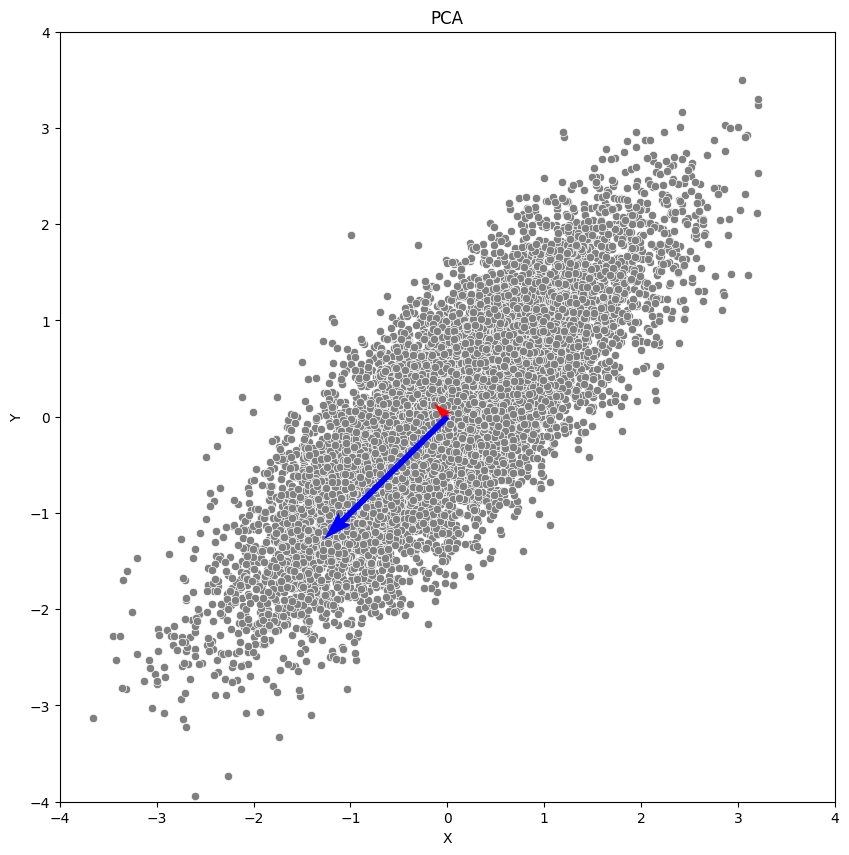

ic| np.dot(pca['first'], pca['second']): np.float64(-2.7755575615628914e-17)


np.float64(-2.7755575615628914e-17)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from icecream import ic


# Load the data
data = pd.read_csv('data/data.csv')

# load PCA vecotrs
pca = pd.read_csv('data/principal_components.csv')
values = pca['value']
pca = pca.drop('value', axis=1)

# the columns of the data are the PCA vectors
# scale each column by the corresponding value
pca['first'] = pca['first'] * values[0]
pca['second'] = pca['second'] * values[1]

#print the length of the vectors
print(np.linalg.norm(pca['first']))
print(np.linalg.norm(pca['second']))

# plot 
plt.figure(figsize=(10, 10))
sns.scatterplot(x='X1', y='X2',data=data, color='grey')    
# plot each column as a vector
ic(pca)
ic(values)
plt.quiver(0, 0, pca['first'][0], pca['first'][1], angles='xy', scale_units='xy', scale=1, color='r')
plt.quiver(0, 0, pca['second'][0], pca['second'][1], angles='xy', scale_units='xy', scale=1, color='b')
# plot lines with the same direction as the vectors
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('PCA')

plt.savefig('plots/pca.png')
plt.show()

# print the dot product of the two vectors
ic(np.dot(pca['first'], pca['second']))



